<a href="https://colab.research.google.com/github/trnq-eu/ml-zoomcamp-2024/blob/main/02_homework_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Zoomcampo - Lesson 02 - Homework 2024

## Dataset

In [17]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-02 04:34:47--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.03s   

2024-10-02 04:34:47 (8.45 MB/s) - ‘laptops.csv.1’ saved [298573/298573]



In [18]:
import pandas as pd

path = '/content/laptops.csv'
df = pd.read_csv(path)

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [20]:
df = df[['ram', 'storage', 'screen', 'final_price']]
df.reset_index(drop=True)
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


<Axes: xlabel='final_price', ylabel='Count'>

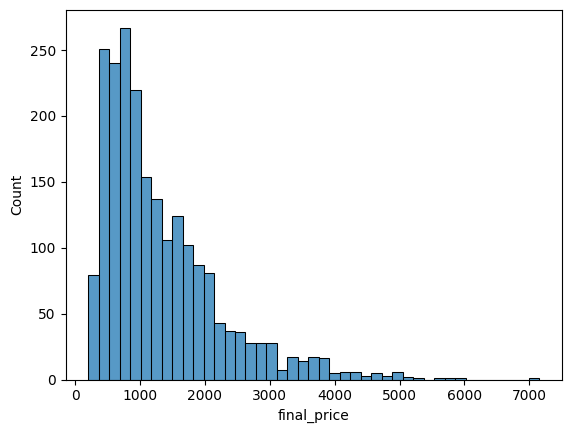

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df.final_price)


In [22]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

screen
[15.6 17.3 14.  16.1 13.3]
29

final_price
[1009.    299.    789.   1199.    669.01]
1440



## Question 1

There's one column with missing values. What is it?

In [23]:
df.isnull().sum()

,0
ram,0
storage,0
screen,4
final_price,0


**Answer**: Screen

## Question 2

What's the median (50% percentile) for variable 'ram'?

In [24]:
df.ram.median()

16.0

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [25]:
SEED = 42

In [26]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [27]:
n_val, n_test, n_train

(432, 432, 1296)

In [28]:
import numpy as np
idx = np.arange(n)
np.random.seed(SEED)
np.random.shuffle(idx)

In [29]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[n_train+n_val:]

In [30]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
-Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

### Fillna with 0

In [31]:
X_train = df_train.fillna(0).values
X_val = df_val.fillna(0).values
X_test = df_test.fillna(0).values



In [32]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [33]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [34]:
df_train.columns

Index(['ram', 'storage', 'screen'], dtype='object')

In [35]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]



In [36]:
# RMSE

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [37]:
X_train = df_train.fillna(0)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train, y_pred)
round(score, 2)

0.45

<Axes: ylabel='Count'>

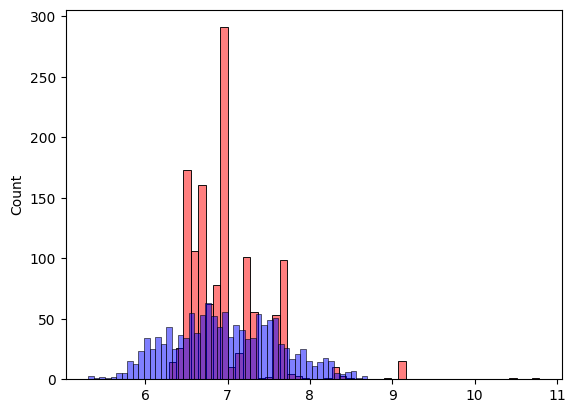

In [38]:

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [39]:
score = rmse(y_train, y_pred)
round(score, 2)

0.45

### Fill with mean

In [40]:
screen_mean = df_train.screen.mean()
screen_mean

15.163534416086618

In [41]:
X_train = df_train.fillna(screen_mean)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
score = rmse(y_train, y_pred)
round(score, 2)

0.45

**Answer**: Both are equally good

## Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [42]:
def prepare_X(df, filler):
  X = df.fillna(filler).values
  return X

In [43]:
X_train = prepare_X(df_train, 0)
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [44]:
def train_linear_regression_reg(X, y, r):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]



In [45]:
for r in  [0, 0.01, 0.1, 1, 5, 10, 100]:
  X_train = prepare_X(df_train, 0)
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)

  X_val = prepare_X(df_val, 0)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)

  print(r, round(score, 2))

0 0.43
0.01 0.43
0.1 0.43
1 0.43
5 0.46
10 0.51
100 0.67


## Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

In [46]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [47]:
import numpy as np

SEED = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

scores = []

n = len(df)

for s in SEED:
  idx = np.arange(n)
  np.random.seed(s)
  np.random.shuffle(idx)

  n_val = int(n*0.2)
  n_test = int(n*0.2)
  n_train = n - n_val - n_test

  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[n_train+n_val:]

  X_train_num = df_train.apply(pd.to_numeric, errors='coerce').fillna(0)
  X_val_num = df_val.apply(pd.to_numeric, errors='coerce').fillna(0)
  X_test_num = df_test.apply(pd.to_numeric, errors='coerce').fillna(0)

  X_train = X_train_num.values
  X_val = X_val_num.values
  X_test = X_test_num.values

  y_train = df_train.final_price.values
  y_val = df_val.final_price.values
  y_test = df_test.final_price.values

  w0, w = train_linear_regression(X_train, y_train)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)

  scores.append((s, score))

scores



[(0, 1.2100208924102347e-11),
 (1, 4.118460931226982e-11),
 (2, 6.531957514707832e-11),
 (3, 2.774163189414943e-11),
 (4, 6.507562681909707e-12),
 (5, 1.4908719591835722e-11),
 (6, 2.6798725259467033e-11),
 (7, 4.735509199073558e-11),
 (8, 3.076612418632468e-11),
 (9, 1.670113324773649e-10)]

In [48]:
score_values = [score for _, score in scores]
score_values

[1.2100208924102347e-11,
 4.118460931226982e-11,
 6.531957514707832e-11,
 2.774163189414943e-11,
 6.507562681909707e-12,
 1.4908719591835722e-11,
 2.6798725259467033e-11,
 4.735509199073558e-11,
 3.076612418632468e-11,
 1.670113324773649e-10]

In [49]:
std = np.std(score_values)
std

4.428365596674178e-11

In [59]:
import pandas as pd
import numpy as np

path = '/content/laptops.csv'
df = pd.read_csv(path)

df.columns = df.columns.str.lower().str.replace(' ', '_')
df2 = df[['ram', 'storage', 'screen', 'final_price']]
df2.reset_index(drop=True)
df2.head()

SEED = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
n = len(df2)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

for s in SEED:
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df2.iloc[idx[:n_train]]
    df_val = df2.iloc[idx[n_train:n_train+n_val]]
    df_test = df2.iloc[idx[n_train+n_val:]]

    # Prepare features (fill missing values with 0)
    X_train = df_train.drop('final_price', axis=1).fillna(0).values
    X_val = df_val.drop('final_price', axis=1).fillna(0).values

    # Prepare target variables
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values

    # Train model and make predictions
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)

    # Calculate RMSE
    score = rmse(y_val, y_pred)
    scores.append(score)

# Calculate standard deviation
std = np.std(scores)
std_rounded = round(std, 3)

print(f"RMSE scores: {scores}")
print(f"Standard deviation of RMSE scores: {std_rounded}")

RMSE scores: [565.4520868771027, 636.7985423056726, 588.9558697907962, 597.8148920012521, 571.962791511102, 573.2383256618949, 647.3438328407208, 550.4398184485952, 587.333503616991, 576.1017929433108]
Standard deviation of RMSE scores: 29.176


## Question 6
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?


In [50]:
import pandas as pd
path = '/content/laptops.csv'
df = pd.read_csv(path)

df.columns = df.columns.str.lower().str.replace(' ', '_')
df2 = df[['ram', 'storage', 'screen', 'final_price']]
df2.reset_index(drop=True)
df2.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### With log on target price

In [51]:
import numpy as np
np.random.seed(2)
SEED = 9
n = len(df2)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df2.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop=True)

y_full_train_orig = df_full_train.final_price.values
y_test_orig = df_test.final_price.values

y_full_train = np.log1p(df_full_train.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_full_train['final_price']
del df_test['final_price']



In [52]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [53]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [54]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [55]:
X_train = prepare_X(df_full_train)
X_test = prepare_X(df_test)
w_0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)
y_pred = w_0 + X_test.dot(w)
rmse = rmse(y_test, y_pred)

In [56]:
rmse

0.43802948955937043

### Without log transformation on target price

In [57]:
import pandas as pd
import numpy as np



# Set random seed
np.random.seed(9)

# Split the data
n = len(df2)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df2.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Combine train and validation datasets
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

# Prepare target variables (without log transformation)
y_full_train = df_full_train.final_price.values
y_test = df_test.final_price.values

# Remove target from features
df_full_train = df_full_train.drop('final_price', axis=1)
df_test = df_test.drop('final_price', axis=1)

def prepare_X(df):
    df_num = df.fillna(0)  # Fill missing values with 0 as per assignment
    X = df_num.values
    return X

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# Prepare features
X_train = prepare_X(df_full_train)
X_test = prepare_X(df_test)

# Train model and make predictions
w_0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)
y_pred = w_0 + X_test.dot(w)

# Calculate RMSE
rmse_value = rmse(y_test, y_pred)
print(f"RMSE: {rmse_value:.2f}")

RMSE: 608.61
